### Imports

In [61]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

### Load Data

In [2]:
state_transitions_file = "../../Data/Test_of_S1_Stim_quiet_period/GoTone_StateTransitions.csv"

In [3]:
state_transitions_data = pd.read_csv(state_transitions_file)

In [4]:
state_transitions_data

,Item1.Trial,Item1.Id,Item1.ElapsedTime,Item2
0,0,ITI,6.163475e+06,5.804883e+07
1,0,EarlyResponse,6.163480e+06,5.805383e+07
2,0,Blink,6.163482e+06,5.805587e+07
3,0,Go,6.163482e+06,5.805587e+07
4,0,Miss,6.163483e+06,5.805688e+07
...,...,...,...,...
584,5,Blink,6.163574e+06,5.814804e+07
585,5,Go,6.163574e+06,5.814804e+07
586,5,Miss,6.163575e+06,5.814905e+07
587,5,ITI2,6.163575e+06,5.814905e+07


### Preprocessing

In [27]:
# normalize elapsed time per trial
state_transitions_data["NormalizedTime"] = state_transitions_data.groupby("Item1.Trial")["Item1.ElapsedTime"].transform(
    lambda x: x - x.min()
)

In [47]:
# label remapping

rename_map = {
    "ITI": "ITI (Trial Start)",
    "EarlyResponse": "EarlyResponse (End of ITI Duration)",
    "Blink": "Blink (Start of Ramp, Overlap with Go)",
    "Go": "Go (Start of Go Trial, Overlap with Blink)",
    "Miss": "Miss (Miss Response of Go Trial, Overlap with ITI2)",
    "Hit": "Hit (Hit Response of Go Trial)", 
    "ITI2": "ITI2 (End of Go Trial, Overlap with Miss/Hit)",
    "Response": "Response (S1 Stimulation)",
    "Joystick": "Joystick (Lick)",
}

state_transitions_data["IdMap"] = state_transitions_data["Item1.Id"].map(rename_map)

### Inspect dataframe

In [48]:
# inspect first few rows
state_transitions_data.head(10)

,Item1.Trial,Item1.Id,Item1.ElapsedTime,Item2,NormalizedTime,IdMap
0,0,ITI,6.163475e+06,5.804883e+07,0.000000,ITI (Trial Start)
1,0,EarlyResponse,6.163480e+06,5.805383e+07,5.002016,EarlyResponse (End of ITI Duration)
2,0,Blink,6.163482e+06,5.805587e+07,7.042016,"Blink (Start of Ramp, Overlap with Go)"
3,0,Go,6.163482e+06,5.805587e+07,7.042016,"Go (Start of Go Trial, Overlap with Blink)"
4,0,Miss,6.163483e+06,5.805688e+07,8.050016,"Miss (Miss Response of Go Trial, Overlap with ..."
5,0,ITI2,6.163483e+06,5.805688e+07,8.050016,"ITI2 (End of Go Trial, Overlap with Miss/Hit)"
6,0,Response,6.163487e+06,5.806089e+07,12.060992,Response (S1 Stimulation)
7,1,ITI,6.163493e+06,5.806648e+07,0.000000,ITI (Trial Start)
8,1,EarlyResponse,6.163498e+06,5.807148e+07,5.003008,EarlyResponse (End of ITI Duration)
9,1,Blink,6.163500e+06,5.807349e+07,7.010016,"Blink (Start of Ramp, Overlap with Go)"


In [66]:
state_transitions_data[state_transitions_data["Item1.Trial"] == 4] 

,Item1.Trial,Item1.Id,Item1.ElapsedTime,Item2,NormalizedTime,IdMap
111,4,ITI,6.163545e+06,5.811936e+07,0.000000,ITI (Trial Start)
112,4,Joystick,6.163546e+06,5.812023e+07,0.868000,Joystick (Lick)
113,4,Joystick,6.163546e+06,5.812025e+07,0.884992,Joystick (Lick)
114,4,Joystick,6.163546e+06,5.812027e+07,0.900992,Joystick (Lick)
115,4,Joystick,6.163546e+06,5.812028e+07,0.916992,Joystick (Lick)
...,...,...,...,...,...,...
535,4,Joystick,6.163567e+06,5.814086e+07,21.494016,Joystick (Lick)
536,4,Joystick,6.163567e+06,5.814088e+07,21.510016,Joystick (Lick)
537,4,Joystick,6.163567e+06,5.814089e+07,21.527008,Joystick (Lick)
538,4,Joystick,6.163567e+06,5.814091e+07,21.544000,Joystick (Lick)


In [65]:
# inspect specific trials and specific events
state_transitions_data[(state_transitions_data["Item1.Trial"] == 4) 
                        & (state_transitions_data["Item1.Id"] == "Joystick")]

,Item1.Trial,Item1.Id,Item1.ElapsedTime,Item2,NormalizedTime,IdMap
112,4,Joystick,6.163546e+06,5.812023e+07,0.868000,Joystick (Lick)
113,4,Joystick,6.163546e+06,5.812025e+07,0.884992,Joystick (Lick)
114,4,Joystick,6.163546e+06,5.812027e+07,0.900992,Joystick (Lick)
115,4,Joystick,6.163546e+06,5.812028e+07,0.916992,Joystick (Lick)
116,4,Joystick,6.163546e+06,5.812030e+07,0.934016,Joystick (Lick)
...,...,...,...,...,...,...
535,4,Joystick,6.163567e+06,5.814086e+07,21.494016,Joystick (Lick)
536,4,Joystick,6.163567e+06,5.814088e+07,21.510016,Joystick (Lick)
537,4,Joystick,6.163567e+06,5.814089e+07,21.527008,Joystick (Lick)
538,4,Joystick,6.163567e+06,5.814091e+07,21.544000,Joystick (Lick)


In [60]:
# inspect specific rows (if too many events)
state_transitions_data[(state_transitions_data["Item1.Trial"] == 4) 
                        & (state_transitions_data["Item1.Id"] == "Joystick")].iloc[180:190]

,Item1.Trial,Item1.Id,Item1.ElapsedTime,Item2,NormalizedTime,IdMap
293,4,Joystick,6.163554e+06,5.812793e+07,8.564992,Joystick (Lick)
294,4,Joystick,6.163554e+06,5.812795e+07,8.582016,Joystick (Lick)
295,4,Joystick,6.163554e+06,5.812796e+07,8.598016,Joystick (Lick)
296,4,Joystick,6.163554e+06,5.812798e+07,8.615008,Joystick (Lick)
297,4,Joystick,6.163554e+06,5.812832e+07,8.948992,Joystick (Lick)
298,4,Joystick,6.163554e+06,5.812833e+07,8.964992,Joystick (Lick)
299,4,Joystick,6.163554e+06,5.812835e+07,8.982016,Joystick (Lick)
300,4,Joystick,6.163554e+06,5.812837e+07,8.999008,Joystick (Lick)
305,4,Joystick,6.163559e+06,5.813258e+07,13.214016,Joystick (Lick)
306,4,Joystick,6.163559e+06,5.813260e+07,13.230016,Joystick (Lick)


### Plot data

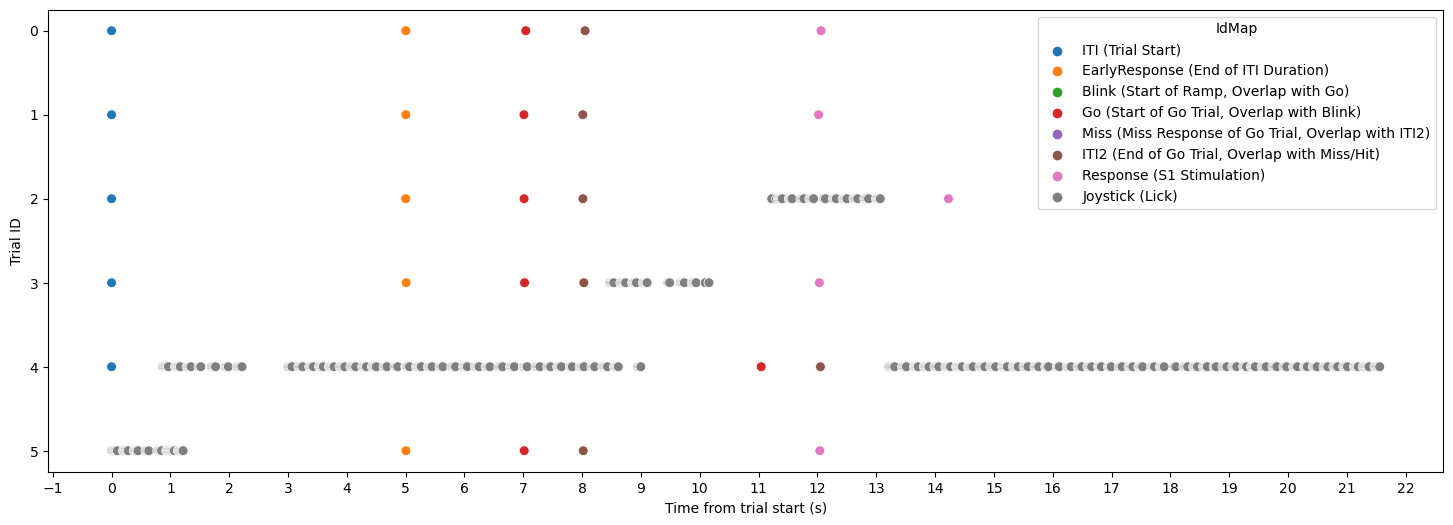

In [63]:
# resize figure so its longer
plt.figure(figsize=(18, 6)) 

# plot data
ax = sns.scatterplot(
    data=state_transitions_data,
    x = "NormalizedTime",
    y = "Item1.Trial",
    hue = "IdMap",
    palette = "tab10",
    s = 50,
)

# change titles
plt.xlabel("Time from trial start (s)")   
plt.ylabel("Trial ID")   

# flip y-axis so that trial 0 stops on top and goes down to trial 5
plt.gca().invert_yaxis()

# plot x-ticks

ax.xaxis.set_major_locator(ticker.MultipleLocator(1))

# show graph
plt.show()